#  Loading important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.neighbors import KNeighborsClassifier 

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

import warnings
warnings.filterwarnings('ignore')

# Importing the Bankrupt Dataset

In [2]:
df=pd.read_excel("C:/Users/rupesh/Desktop/bank data.xlsx")
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis

### There is an extra space before the names of attributes,removing that space

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '')

## Checking is there any missing values are there in data or not


### Plotting heatmap for checking of null values

<AxesSubplot:>

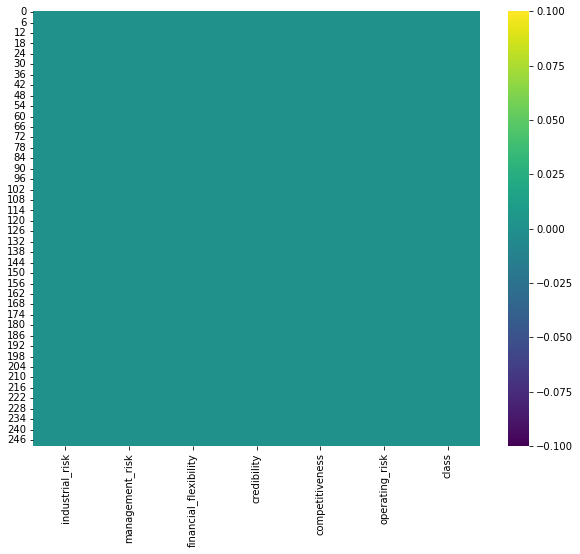

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [7]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

• There are no null values in dataset

## Checking for correlation in dataset

In [8]:
df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


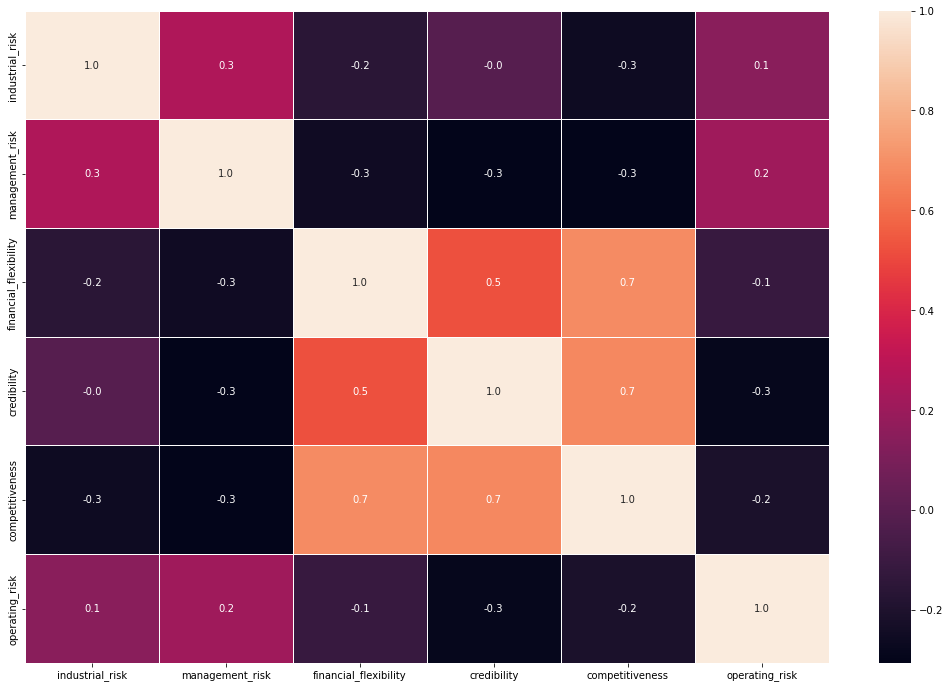

In [9]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

• There is no High correlation between input variables

## Checking for duplicate values

In [10]:
df[df.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
13,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
15,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
16,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
18,0.5,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


• There are 147 Duplicate values in our dataset, so removing those values

In [11]:
df1=df.drop_duplicates()
df1

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


# Visualizations

##   Histogram for every features

industrial_risk


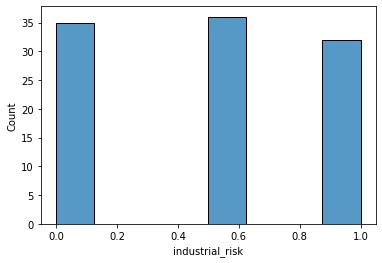

management_risk


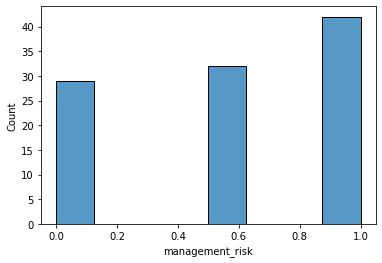

financial_flexibility


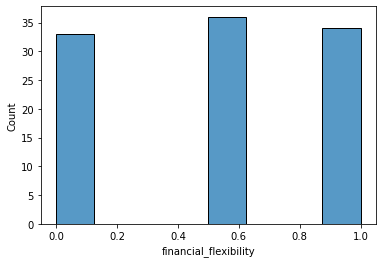

credibility


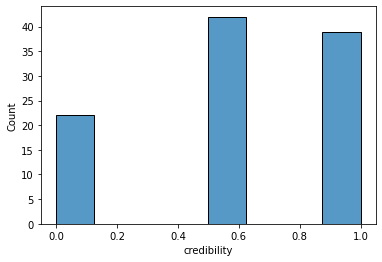

competitiveness


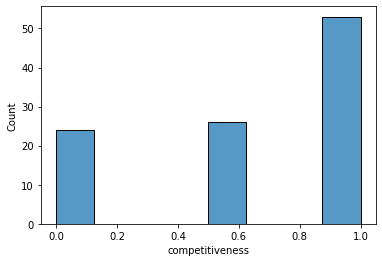

operating_risk


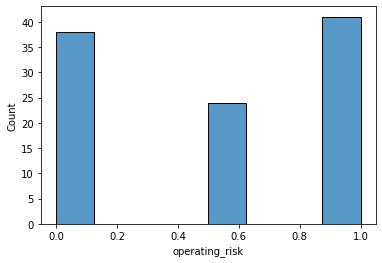

class


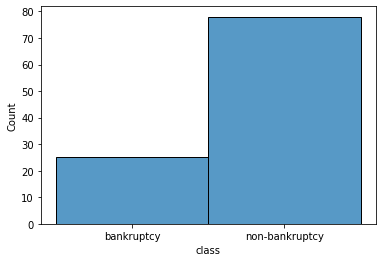

In [12]:

for n in df1.columns:
    print(n)
    sns.histplot(df1[n])
    plt.show()

## Boxplot for outliers detection

<AxesSubplot:xlabel='operating_risk'>

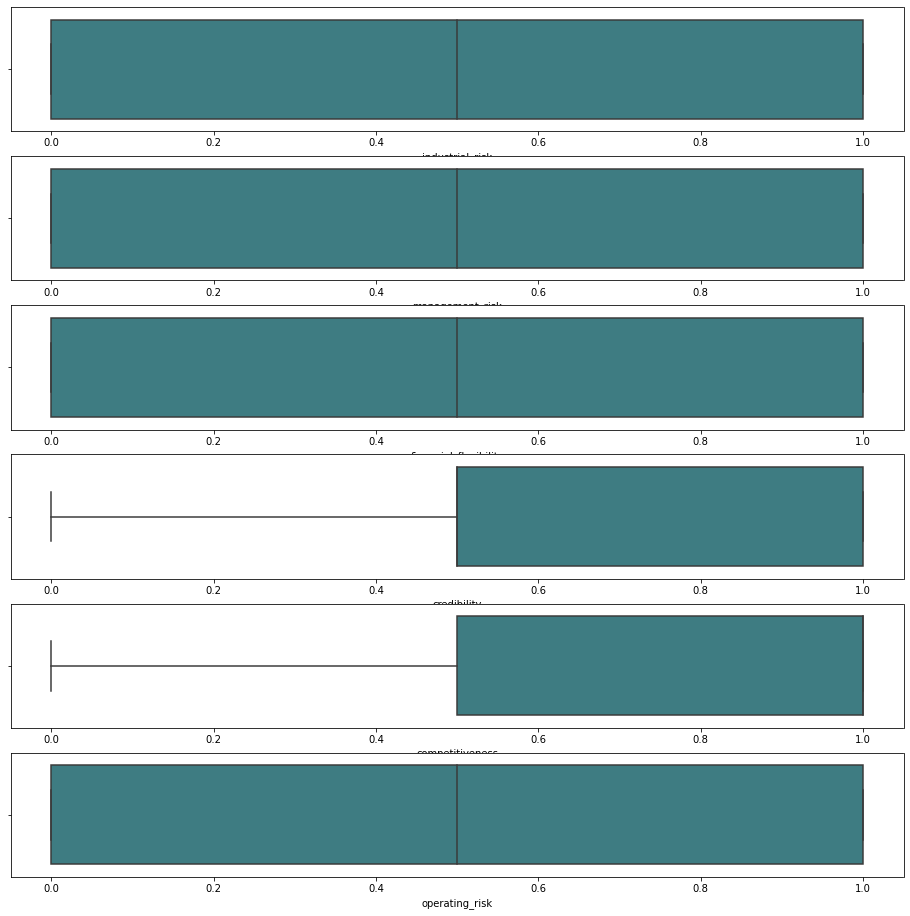

In [13]:

ot=df1.copy() 
fig, axes=plt.subplots(6,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='industrial_risk',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='management_risk',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='financial_flexibility',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='credibility',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='competitiveness',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='operating_risk',data=ot,palette='crest',ax=axes[5])

<AxesSubplot:>

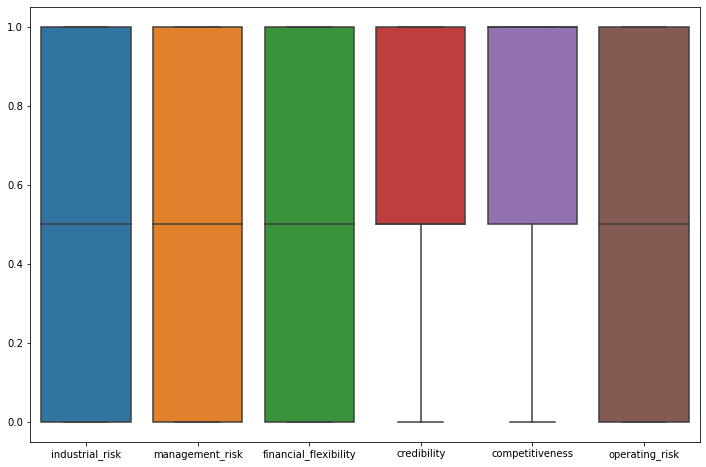

In [14]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=df1)

#### • There are no Outliers in the dataset

## Bivariate Plot

• Plotting bivariate plot of each feature with respect to target variable.

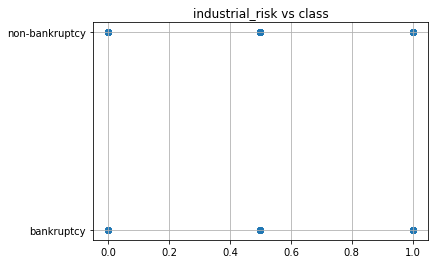

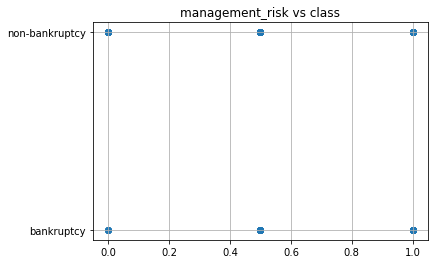

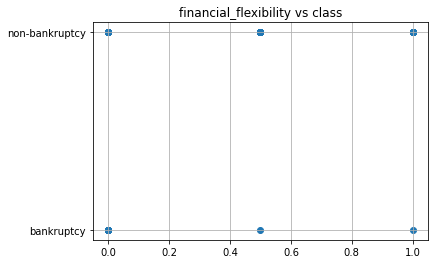

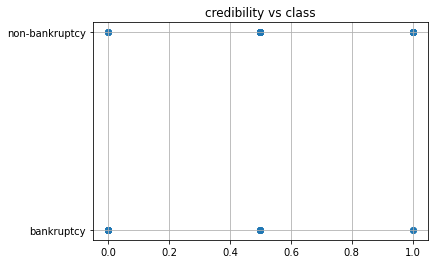

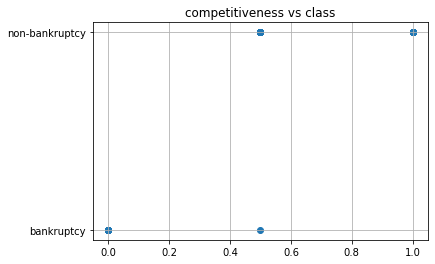

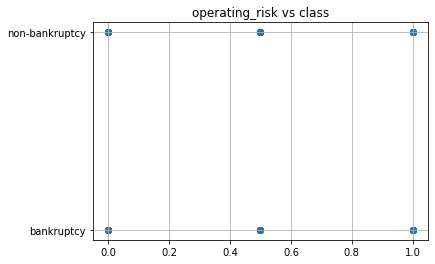

In [15]:
for i in df1.columns:
    if i!="class": 
        plt.scatter((df1[i]),(df1['class']))
        plt.title(i+ ' vs class')
        plt.grid()
        plt.show()

## Splitting data set in input and output variable

In [16]:
x=df1.drop(columns='class')
y=df1['class']

## Univariate plots.


industrial_risk


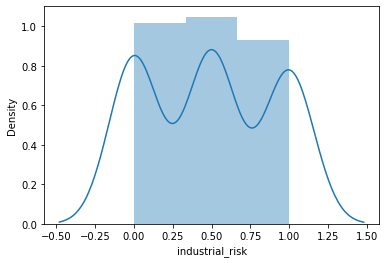

management_risk


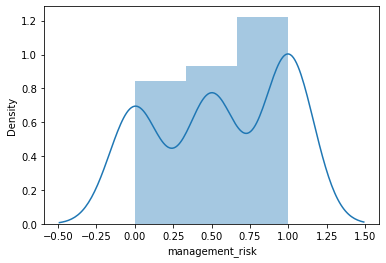

financial_flexibility


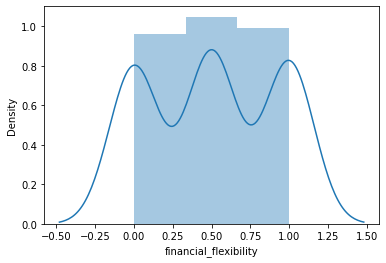

credibility


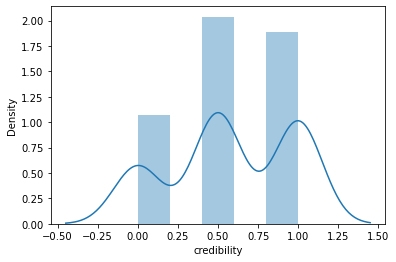

competitiveness


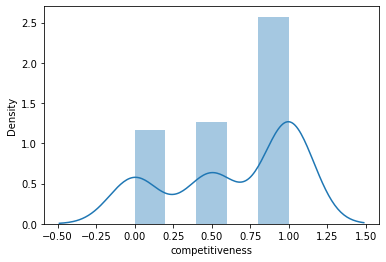

operating_risk


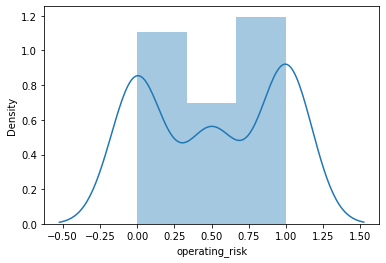

In [17]:
for n in x.columns:
    print(n)
    sns.distplot(x[n])
    plt.show()

<AxesSubplot:xlabel='operating_risk'>

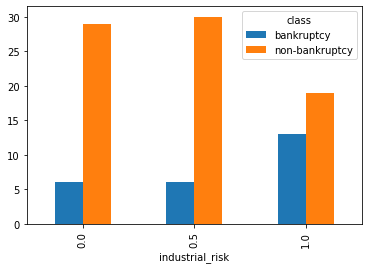

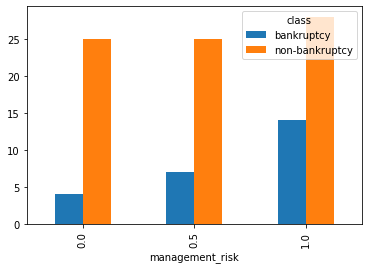

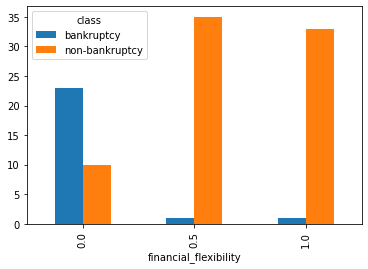

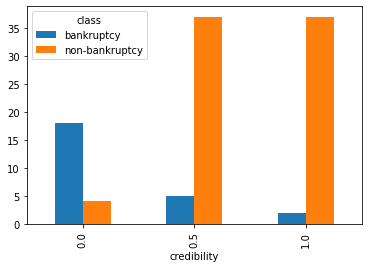

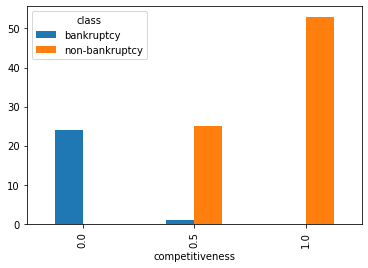

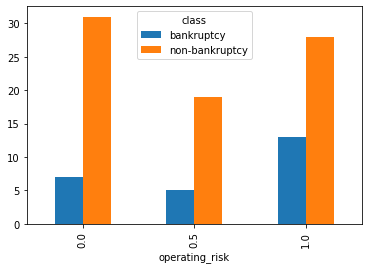

In [18]:
pd.crosstab(x['industrial_risk'], y).plot(kind = 'bar')
pd.crosstab(x['management_risk'], y).plot(kind = 'bar')
pd.crosstab(x['financial_flexibility'], y).plot(kind = 'bar')
pd.crosstab(x['credibility'], y).plot(kind = 'bar')
pd.crosstab(x['competitiveness'], y).plot(kind = 'bar')
pd.crosstab(x['operating_risk'], y).plot(kind = 'bar')

###  Checking for values count 

<AxesSubplot:ylabel='class'>

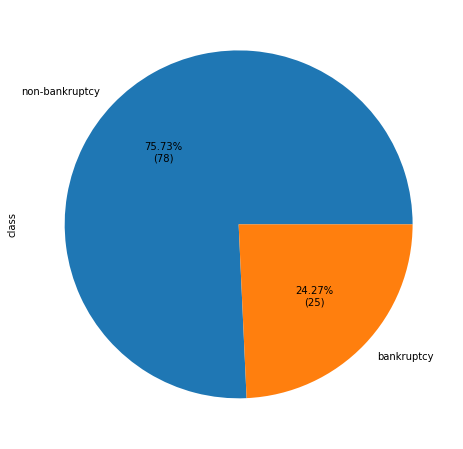

In [19]:
plt.figure(figsize=(8,8))
y.value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(y.value_counts().sum())))

In [20]:
y.value_counts()

non-bankruptcy    78
bankruptcy        25
Name: class, dtype: int64

### We can see that after dropping duplicate values our dataset become unbalance
#### Using SMOTE  method to balance dataset

• SMOTE increases the number of low impact examples in a dataset using synthetic minority oversampling. In this article, I’m going to walk you through what is SMOTE in Machine Learning and how you can use it to deal with unbalanced datasets.

In [21]:
smk=SMOTETomek(random_state=42)
X,Y=smk.fit_resample(x,y)

<AxesSubplot:ylabel='class'>

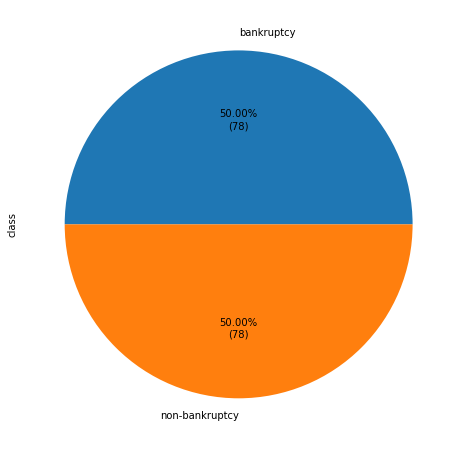

In [22]:
plt.figure(figsize=(8,8))
Y.value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(Y.value_counts().sum())))

In [23]:
Y.value_counts()

bankruptcy        78
non-bankruptcy    78
Name: class, dtype: int64

• Now our data is balanced.

## Converting target variable into integer,using label encoding.

In [24]:
Y= label_encoder.fit_transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Splitting data for training and testing

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.8,random_state=0)

# Model Building

## 1.Logistic Regression

In [26]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_pred,y_test)*100

98.4

In [27]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[64,  2],
       [ 0, 59]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

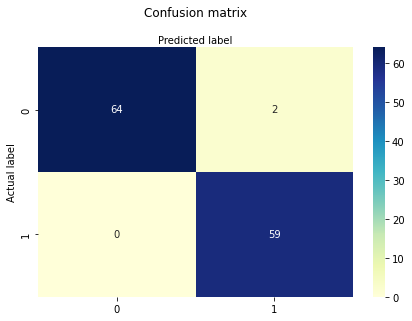

In [28]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.97      1.00      0.98        59

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



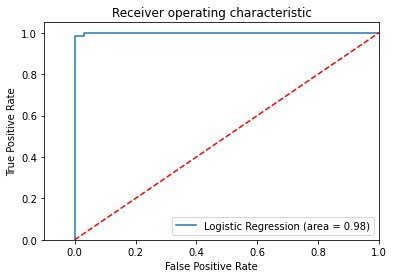

In [30]:
# ROC Curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 2.Decision Tree

In [31]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [32]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

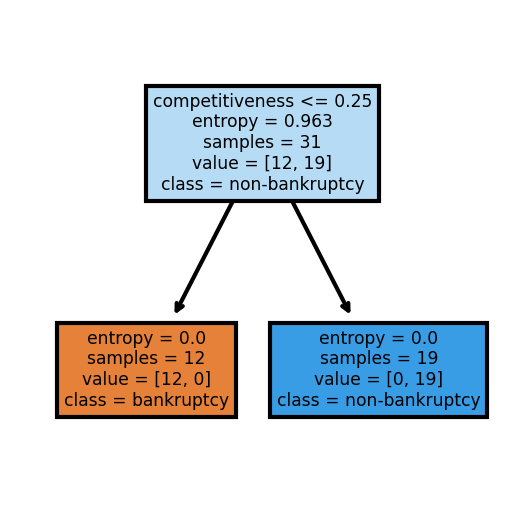

In [33]:
fn=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
cn=['bankruptcy', 'non-bankruptcy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [35]:
accuracy_score(y_test,y_pred)*100

97.6

## 3.Random Forest

In [36]:
ran_forest=RandomForestClassifier(n_estimators=50,max_features=3)
ran_forest.fit(x_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=50)

In [37]:
y_pred=ran_forest.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [38]:
accuracy_score(y_test,y_pred)*100

97.6

## 4.Boosting 
### 1.Adaboost

In [39]:
adaboost=AdaBoostClassifier(n_estimators=50,random_state=7)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(random_state=7)

In [40]:
y_pred=adaboost.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [41]:
accuracy_score(y_test,y_pred)*100

97.6

### 2.XGBoost

In [42]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.60%


### 3.LGBM

In [43]:
# Defining Parameters
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 5
params['min_data'] = 50
params['max_depth'] = 4

In [44]:
lgmodel = lgb.train(params, d_train, 50)
y_pred=lgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Number of positive: 19, number of negative: 12
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.612903 -> initscore=0.459532
[LightGBM] [Info] Start training from score 0.459532
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [45]:
accuracy_score(y_test, predictions)*100

47.199999999999996

## 5.KNN

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [48]:
accuracy_score(y_test,y_pred)*100

98.4

## 6.SVM

In [49]:
# Hyperparameter Tuning
svm = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(svm,param_grid,cv=10)
gsv.fit(x_train,y_train)
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 1.0)

In [50]:
svm= SVC(C= 15, gamma = 0.5,kernel='rbf')
svm.fit(x_train , y_train)
y_pred4 = svm.predict(x_test)
accuracy_score(y_test, y_pred) * 100

98.4

### Selection of best Model
• From the above models, we can see that 'Logistic Regression', 'KNN' and 'SVM' are giving the best accuracy
  which is 98.4.
  
• Finalizing SVM Model.

## Creating Pickle file

In [51]:
import pickle

In [53]:
pickle_out = open("SVM.pkl","wb")
pickle.dump(svm, pickle_out)
pickle_out.close()